In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [19]:
# Load initial input data
inputs = np.load('initial_inputs.npy', allow_pickle=True)
#print(len(inputs))
print(inputs)
# Load initial output data
outputs = np.load('initial_outputs.npy', allow_pickle=True)
#print(len(outputs))
print(outputs)


[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]


In [20]:
#Append week-1 data.
#Function 1: input	[0.848485, 0.777778]
inputs = np.append(inputs, [[0.848485, 0.777778]], axis=0)
#Function 1:	-1.2487829338434956e-49
outputs = np.append(outputs, [-1.2487829338434956e-49], axis=0)

In [21]:
#Append week-2 data.
#Function 1:	[0.404040, 0.959596]
inputs = np.append(inputs, [[0.404040, 0.959596]], axis=0)
#Function 1:	-9.343447791332904e-112
outputs = np.append(outputs, [-9.343447791332904e-112], axis=0)

In [22]:
print(len(inputs))
print(inputs)
print(len(outputs))
print(outputs)

12
[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]
 [0.848485   0.777778  ]
 [0.40404    0.959596  ]]
12
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048 -1.24878293e-049 -9.34344779e-112]


In [23]:
X = inputs
y = outputs

In [24]:
%run ../common_functions.ipynb
# Initialize result collection
query_results = []


Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.73737374 0.73737374]


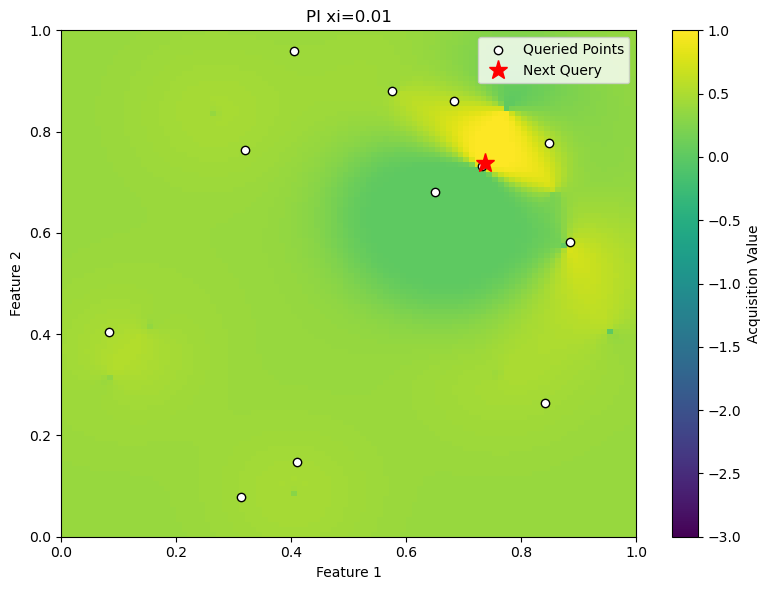

In [25]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.01, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='PI xi=0.01', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.01, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.73737374 0.73737374]


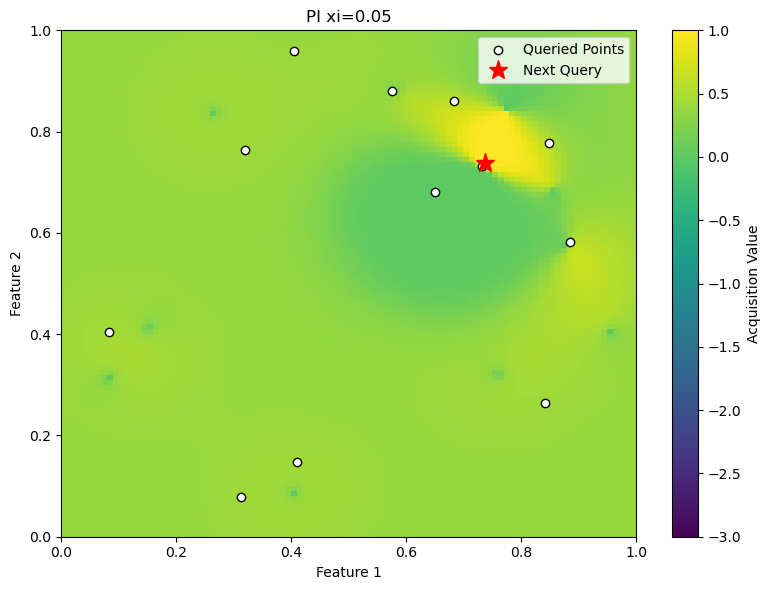

In [26]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.05, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='PI xi=0.05', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.05, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.75757576 0.74747475]


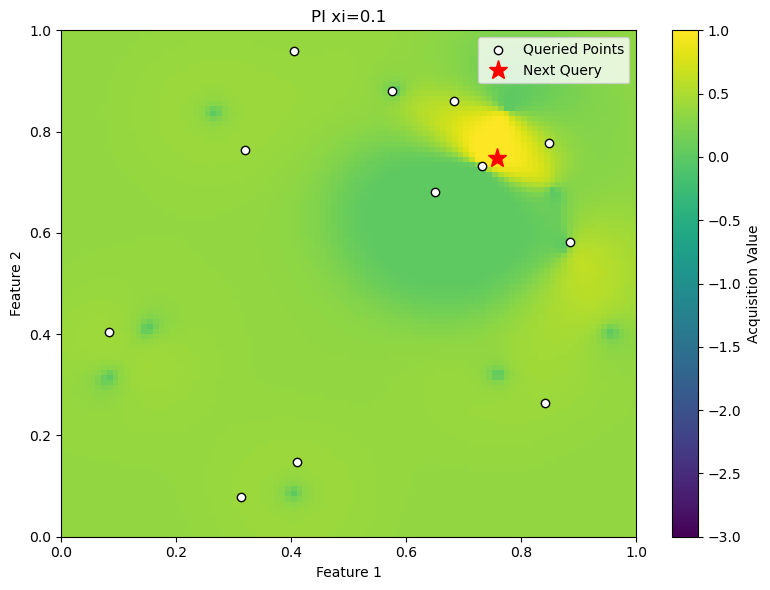

In [27]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='PI', xi=0.1, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='PI xi=0.1', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('PI', 0.1, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.80808081 0.70707071]


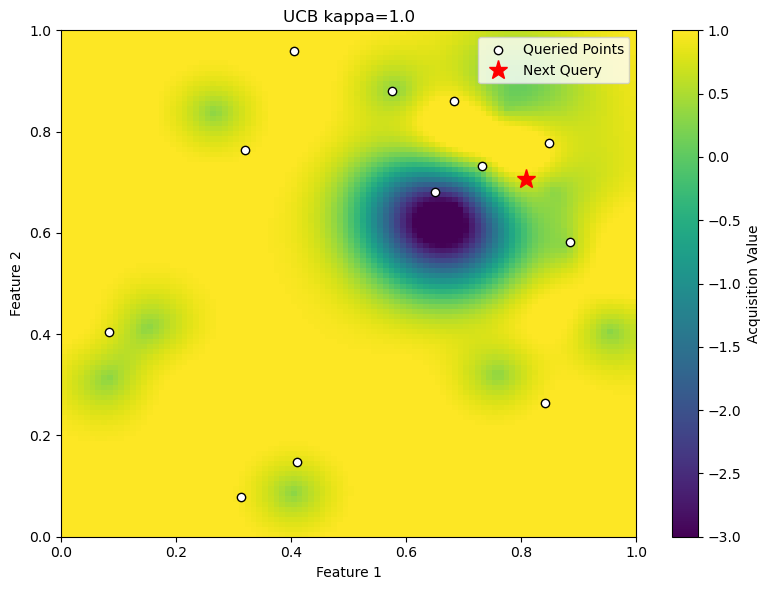

In [28]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=1.0, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='UCB kappa=1.0', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 1.0, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.24242424 0.27272727]


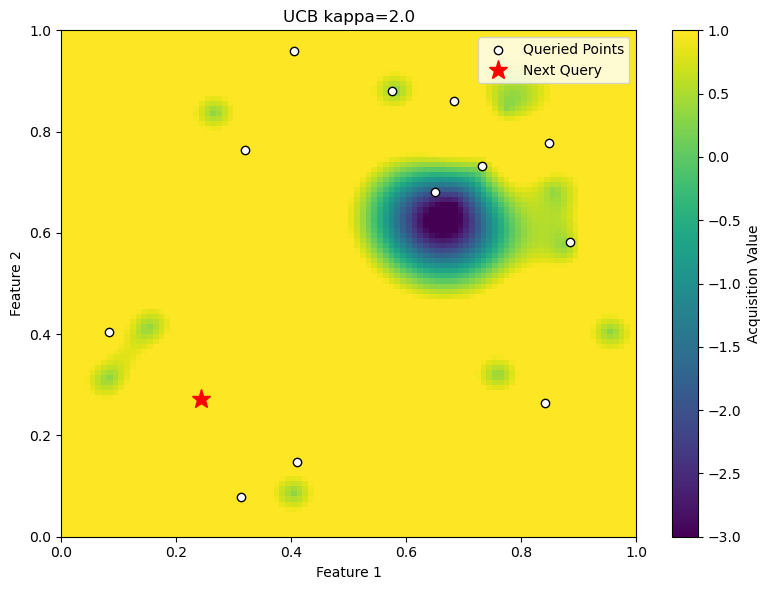

In [29]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=2.0, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='UCB kappa=2.0', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 2.0, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.25252525 0.28282828]


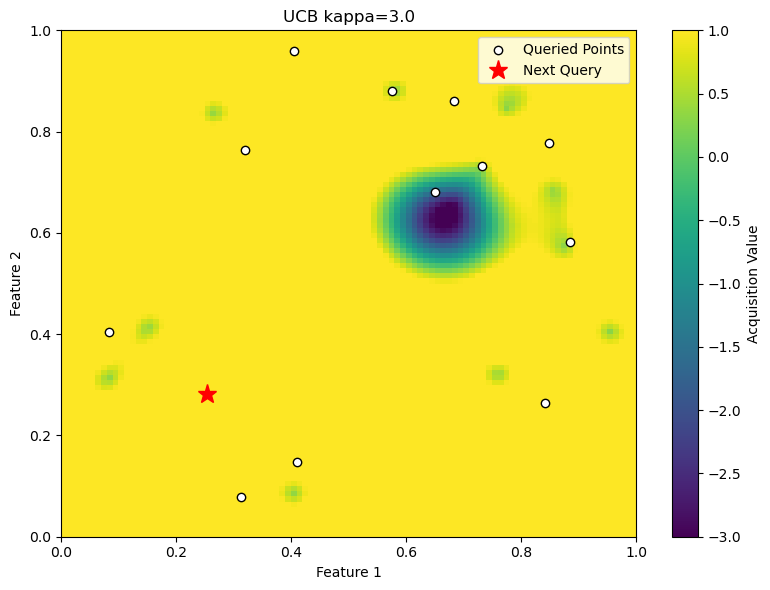

In [30]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='UCB', kappa=3.0, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='UCB kappa=3.0', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('UCB', 3.0, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.77777778 0.75757576]


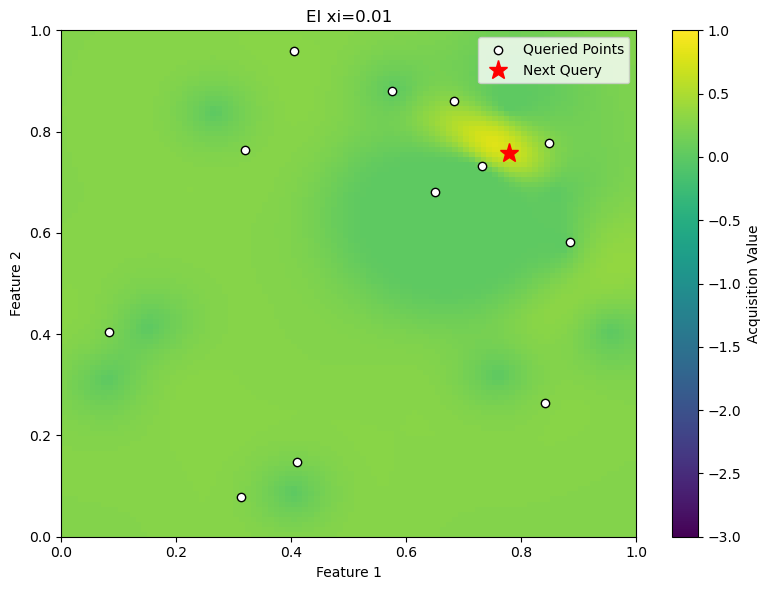

In [31]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.01, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='EI xi=0.01', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.01, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.77777778 0.75757576]


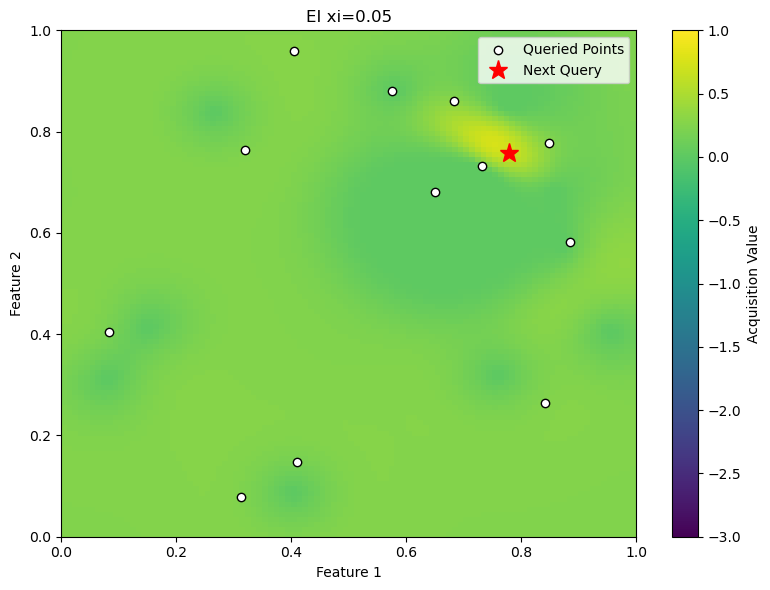

In [32]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.05, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='EI xi=0.05', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.05, next_point,score)

Number of features:  2
Dimension of input space: 2
Each axis has 100 points before downsampling
Each axis has 100 points after downsampling
Function will evaluate across: 10000 points
Mean  10000
Std   10000
Next query point: [0.77777778 0.75757576]


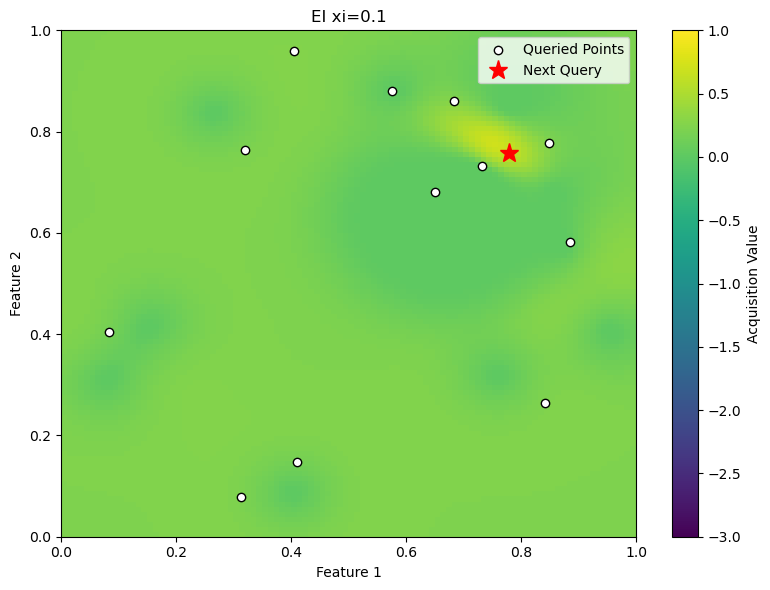

In [33]:
next_point, acq_vals, grid = select_next_query_multi(X, y, method='EI', xi=0.1, apply_scaling=True)
print("Next query point:", next_point)
plot_acquisition_heatmap(X, acq_vals, grid, next_query=next_point, title='EI xi=0.1', cmap='viridis')
score = acq_vals[np.argmax(acq_vals)]
log_query_candidate('EI', 0.1, next_point,score)

In [34]:
find_best_candidate(query_results)

Total number of points to evaluate: 9
{'method': 'PI', 'xi': 0.01, 'kappa': None, 'x': array([0.73737374, 0.73737374]), 'score': np.float64(0.99999999458179), 'dim': 2}
{'method': 'PI', 'xi': 0.05, 'kappa': None, 'x': array([0.73737374, 0.73737374]), 'score': np.float64(0.9999979075837483), 'dim': 2}
{'method': 'PI', 'xi': 0.1, 'kappa': None, 'x': array([0.75757576, 0.74747475]), 'score': np.float64(0.9999763519548742), 'dim': 2}
{'method': 'UCB', 'xi': None, 'kappa': 1.0, 'x': array([0.80808081, 0.70707071]), 'score': np.float64(1.3645669398552513), 'dim': 2}
{'method': 'UCB', 'xi': None, 'kappa': 2.0, 'x': array([0.24242424, 0.27272727]), 'score': np.float64(2.050166826894578), 'dim': 2}
{'method': 'UCB', 'xi': None, 'kappa': 3.0, 'x': array([0.25252525, 0.28282828]), 'score': np.float64(3.0345464357264484), 'dim': 2}
{'method': 'EI', 'xi': 0.01, 'kappa': None, 'x': array([0.77777778, 0.75757576]), 'score': np.float64(0.7972021828087507), 'dim': 2}
{'method': 'EI', 'xi': 0.05, 'kappa

{'method': 'UCB',
 'xi': None,
 'kappa': 3.0,
 'x': array([0.25252525, 0.28282828]),
 'score': np.float64(3.0345464357264484),
 'dim': 2}